In [1]:
#-*- coding: UTF-8 -*-

from numpy import *
import operator

In [2]:
def createDataSet():
    group=array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels

In [3]:
def classify0(inX,dataSet,labels,k):#inX是被测试的向量，dataSet是训练集，labels是训练集的label
    dataSetSize=dataSet.shape[0] #dataSet的长度
    diffMat=tile(inX,(dataSetSize,1))-dataSet#差
    sqDiffMat=diffMat**2#各自求平方
    sqDistances=sqDiffMat.sum(axis=1)#求和
    distances=sqDistances**0.5
    sortedDistIndicies=distances.argsort()#从小到大的排序的index
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]] #求label
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1 #转化为计数字典
    sortedClassCount=sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)#对计数字典进行排序
    return sortedClassCount[0][0]

In [4]:
def file2matrix(filename):
    fr=open(filename)
    numberOfLines=len(fr.readlines())
    returnMat=zeros((numberOfLines,3))
    classLabelVector=[]
    fr=open(filename)
    index=0
    for line in fr.readlines():
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index,:]=listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index+=1
    return returnMat,classLabelVector

In [5]:
datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
fig=plt.figure()

In [10]:
ax=fig.add_subplot(1,1,1)

In [11]:
ax.scatter(datingDataMat[:,1], datingDataMat[:, 2], 15.0*array(datingLabels), 15.0*array(datingLabels)) 

In [12]:
plt.show()

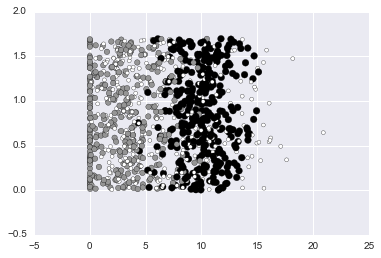

In [13]:
fig

In [15]:
def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSet=zeros(shape(dataSet))
    m=normDataSet.shape[0]
    normDataSet=dataSet-tile(minVals,(m,1))
    normDataSet=normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [25]:
def datingClassTest():
    hoRatio=0.10
    datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    for i in range(numTestVecs):#取前numTestVecs为测试集
        classifierResult=classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print "the classifier came back with:%d, the real answer is : %d"%(classifierResult,datingLabels[i])
        if classifierResult!=datingLabels[i]:
            errorCount+=1.0
    print "the total error rate is:%f"%(errorCount/float(numTestVecs))
    

In [27]:
def img2vector(filename):
    returnVect=zeros((1,1024))
    fr=open(filename)
    for i in range(32):
        lineStr=fr.readline()
        for j in range(32):
            returnVect[0,32*i+j]=int(lineStr[j])
    return returnVect

In [32]:
from os import listdir

In [33]:
hwLabels=[]

In [61]:
trainingFileList=listdir('trainingDigits')

In [63]:
m=len(trainingFileList)

In [64]:
trainingMat=zeros((m,1024))

In [65]:
for i in range(m):
    fileNameStr=trainingFileList[i]
    fileStr=fileNameStr.split('.')[0]
    classNumStr=int(fileStr.split('_')[0])
    hwLabels.append(classNumStr)
    trainingMat[i,:]=img2vector('trainingDigits/%s'%fileNameStr)
    

In [66]:
testFileList=listdir('testDigits')

In [74]:
errorCount=0.0

In [75]:
mTest=len(testFileList)

In [76]:
for i in range(mTest):
    fileNameStr=testFileList[i]
    fileStr=fileNameStr.split('.')[0]
    classNumStr=int(fileStr.split('_')[0])
    vectorUnderTest=img2vector('testDigits/%s'%fileNameStr)
    classifierResult=classify0(vectorUnderTest,trainingMat,hwLabels,3)
    print "the classifier came back with:%d,the real answer is: %d"%(classifierResult,classNumStr)
    if classifierResult!=classNumStr:
        errorCount+=1.0

the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back with:0,the real answer is: 0
the classifier came back wit

In [77]:
errorCount

240.0

In [78]:
errorCount/float(mTest)

0.2536997885835095